In [ ]:
food_df = pd.read_csv("data/nndb_flat.csv")

In [ ]:
food_df2 = food_df.iloc[:,0:13]
food_df2.head(2)
food_df2 = food_df2.dropna(axis = 'columns', how ='any')

In [ ]:
# food_df3=food_df2.drop(['ShortDescrip'], axis=1)
food_df3.tail(3)

In [ ]:
def handle_non_numerical_data(food_df3):
    columns =food_df3.columns.values#for all columns
    
    for column in columns:
        text_digit_vals ={}#suruma text digit value empty pathako
        
        def convert_to_int(val):#textlai int ma convert garne fun banako
            return text_digit_vals[val]
        #nnumber ho ki haina check gareko
        if food_df3[column].dtype != np.int64 and food_df3[column].dtype!= np.float64:
            column_contents = food_df3[column].values.tolist()
            unique_elements = set(column_contents)
            x =0
            
            for unique in unique_elements:  #number ho bhane unique element lag abhneeko
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x += 1
            
            food_df3[column] = list(map(convert_to_int, food_df3[column]))
            
    return food_df3

In [ ]:
food_df3 = handle_non_numerical_data(food_df3)

In [ ]:
food_df3.head(2)

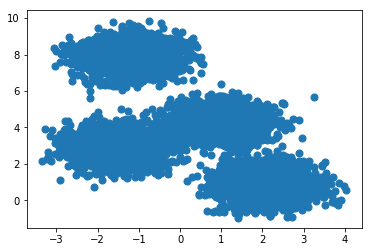

In [13]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=8000, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

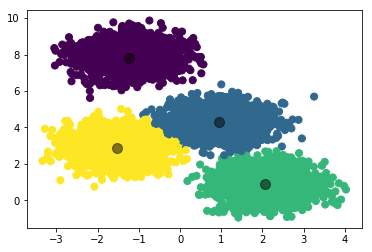

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

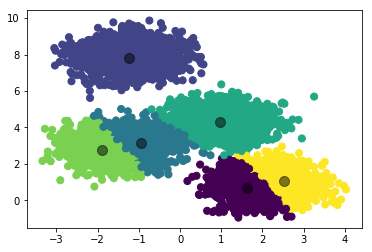

In [16]:
#Let's take 6 clusters and do the separation.
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# loading the dataset
#from sklearn.datasets import load_digits
food_df = pd.read_csv("data/nndb_flat.csv")
food_df2 = food_df.iloc[:,0:13]
food_df2.head(2)
food_df2 = food_df2.dropna(axis = 'columns', how ='any')
food_df3=food_df2.drop(['ShortDescrip'], axis=1)

food_df3.head(5)

,ID,FoodGroup,Descrip,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g
0,1001,Dairy and Egg Products,"Butter, salted",717.0,0.85,81.11,0.06,0.06,0.0
1,1002,Dairy and Egg Products,"Butter, whipped, with salt",717.0,0.85,81.11,0.06,0.06,0.0
2,1003,Dairy and Egg Products,"Butter oil, anhydrous",876.0,0.28,99.48,0.00,0.00,0.0
3,1004,Dairy and Egg Products,"Cheese, blue",353.0,21.40,28.74,2.34,0.50,0.0
4,1005,Dairy and Egg Products,"Cheese, brick",371.0,23.24,29.68,2.79,0.51,0.0


In [22]:
def handle_non_numerical_data(food_df3):
    columns =food_df3.columns.values#for all columns
    
    for column in columns:
        text_digit_vals ={}#suruma text digit value empty pathako
        
        def convert_to_int(val):#textlai int ma convert garne fun banako
            return text_digit_vals[val]
        #nnumber ho ki haina check gareko
        if food_df3[column].dtype != np.int64 and food_df3[column].dtype!= np.float64:
            column_contents = food_df3[column].values.tolist()
            unique_elements = set(column_contents)
            x =0
            
            for unique in unique_elements:  #number ho bhane unique element lag abhneeko
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x += 1
            
            food_df3[column] = list(map(convert_to_int, food_df3[column]))
            
    return food_df3

In [24]:
food_df3 = handle_non_numerical_data(food_df3)

In [25]:
food_df3.head(5)

,ID,FoodGroup,Descrip,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g
0,1001,1,7371,717.0,0.85,81.11,0.06,0.06,0.0
1,1002,1,3221,717.0,0.85,81.11,0.06,0.06,0.0
2,1003,1,458,876.0,0.28,99.48,0.00,0.00,0.0
3,1004,1,4313,353.0,21.40,28.74,2.34,0.50,0.0
4,1005,1,8323,371.0,23.24,29.68,2.79,0.51,0.0


In [34]:
kmeans = KMeans(n_clusters=7, random_state=0)
clusters = kmeans.fit_predict(food_df3)
kmeans.cluster_centers_.shape

(7, 9)

TypeError: Invalid dimensions for image data

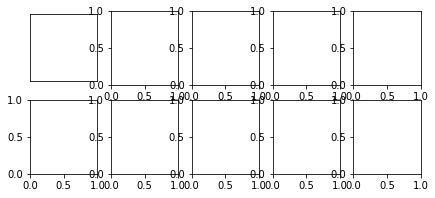

In [32]:
fig, ax = plt.subplots(2, 5, figsize=(7, 3))
centers = kmeans.cluster_centers_.reshape(7, 9)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)